In [27]:
import csv
import matplotlib.pyplot as plt
import os

In [34]:
PERF_FILE = 'results/sim_data_performance.csv'
POWERSAVE_FILE = 'results/sim_data_powersave.csv'
SCHEDUTIL_FILE = 'results/sim_data_schedutil.csv'
SINGLE_LOW_FILE = 'results/1corelowload.csv'
SINGLE_HIGH_FILE = 'results/1corehighload.csv'
SINGLE_MID_FILE = 'results/1coremediumload.csv'
DUAL_LOW_FILE = 'results/2corelowload.csv'
DUAL_HIGH_FILE = 'results/2corehighload.csv'
DUAL_MID_FILE = 'results/2coremediumload.csv'
GRAPHS_DIR = 'graphs'

NUM_RUNS = 10

num_users_PERF = []
response_times_PERF = []
good_puts_PERF = []
bad_puts_PERF = []
request_drop_rates_PERF = []
core_utilisations_PERF = []
avg_queue_length_PERF = []
avg_waiting_time_in_queue_PERF = []

num_users_POWER = []
response_times_POWER = []
good_puts_POWER = []
bad_puts_POWER = []
request_drop_rates_POWER = []
core_utilisations_POWER = []
avg_queue_length_POWER = []
avg_waiting_time_in_queue_POWER = []

num_users_SCHED = []
response_times_SCHED = []
good_puts_SCHED = []
bad_puts_SCHED = []
request_drop_rates_SCHED = []
core_utilisations_SCHED = []
avg_queue_length_SCHED = []
avg_waiting_time_in_queue_SCHED = []

time_low_single = []
frequency_low_single = []

time_high_single = []
frequency_high_single = []

time_mid_single = []
frequency_mid_single = []

time_low_dual = []
frequency_low_one_dual = []
frequency_low_two_dual = []

time_high_dual = []
frequency_high_one_dual = []
frequency_high_two_dual = []

time_mid_dual = []
frequency_mid_one_dual = []
frequency_mid_two_dual = []


In [35]:
def load_data(filename: str, numUsers: list, responseTimes: list, goodPuts: list, badPuts: list, requestDropRates: list, coreUtilisations: list, avgQueueLength: list, avgWaitingTimeInQueue: list):
    with open(filename) as f:
        reader = csv.reader(f)

        next(reader)
        next(reader)
        next(reader)

        for line in reader:
            numUsers.append(int(line[0]))
            responseTimes.append(list(map(float,line[1:NUM_RUNS+1])))
            goodPuts.append(list(map(float,line[(NUM_RUNS + 1):(2 * NUM_RUNS) + 1])))
            badPuts.append(list(map(float,line[(2 * NUM_RUNS + 1):(3 * NUM_RUNS) + 1])))
            requestDropRates.append(list(map(float,line[(3 * NUM_RUNS + 1):(4 * NUM_RUNS) + 1])))
            coreUtilisations.append(list(map(float,line[(4 * NUM_RUNS + 1):(5 * NUM_RUNS) + 1])))
            avgQueueLength.append(list(map(float,line[(5 * NUM_RUNS + 1):(6 * NUM_RUNS) + 1])))
            avgWaitingTimeInQueue.append(list(map(float,line[(6 * NUM_RUNS + 1):(7 * NUM_RUNS) + 1])))

def avg(l: list) -> float:
    return sum(l) / len(l)

def alt_load_single(filename: str, time: list, frequency: list):
    with open(filename) as f:
        reader = csv.reader(f)

        next(reader)
        for line in reader:
            time.append(float(line[0]))
            frequency.append(float(line[1]))

def alt_load_dual(filename: str, time: list, frequency_one: list, frequency_two: list):
    with open(filename) as f:
        reader = csv.reader(f)

        next(reader)
        for line in reader:
            time.append(float(line[0]))
            frequency_one.append(float(line[1]))
            frequency_two.append(float(line[2]))

In [36]:
# create directory for graphs
if not os.path.exists(GRAPHS_DIR):
    os.makedirs(GRAPHS_DIR)

load_data(PERF_FILE, num_users_PERF, response_times_PERF, good_puts_PERF, bad_puts_PERF, request_drop_rates_PERF, core_utilisations_PERF, avg_queue_length_PERF, avg_waiting_time_in_queue_PERF)
load_data(POWERSAVE_FILE, num_users_POWER, response_times_POWER, good_puts_POWER, bad_puts_POWER, request_drop_rates_POWER, core_utilisations_POWER, avg_queue_length_POWER, avg_waiting_time_in_queue_POWER)
load_data(SCHEDUTIL_FILE, num_users_SCHED, response_times_SCHED, good_puts_SCHED, bad_puts_SCHED, request_drop_rates_SCHED, core_utilisations_SCHED, avg_queue_length_SCHED, avg_waiting_time_in_queue_SCHED)

alt_load_single(SINGLE_LOW_FILE, time_low_single, frequency_low_single)
alt_load_single(SINGLE_HIGH_FILE, time_high_single, frequency_high_single)
alt_load_single(SINGLE_MID_FILE, time_mid_single, frequency_mid_single)
alt_load_dual(DUAL_LOW_FILE, time_low_dual, frequency_low_one_dual, frequency_low_two_dual)
alt_load_dual(DUAL_HIGH_FILE, time_high_dual, frequency_high_one_dual, frequency_high_two_dual)
alt_load_dual(DUAL_MID_FILE, time_mid_dual, frequency_mid_one_dual, frequency_mid_two_dual)

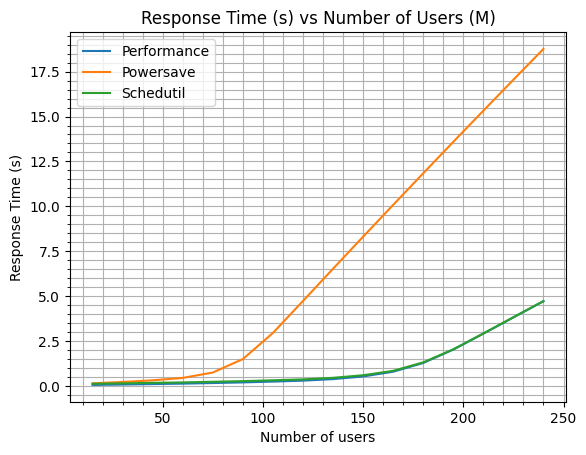

In [11]:
plt.plot(num_users_PERF, list(map(avg, response_times_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, response_times_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, response_times_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Response Time (s)')
plt.title('Response Time (s) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/resp_time.png')
plt.show()

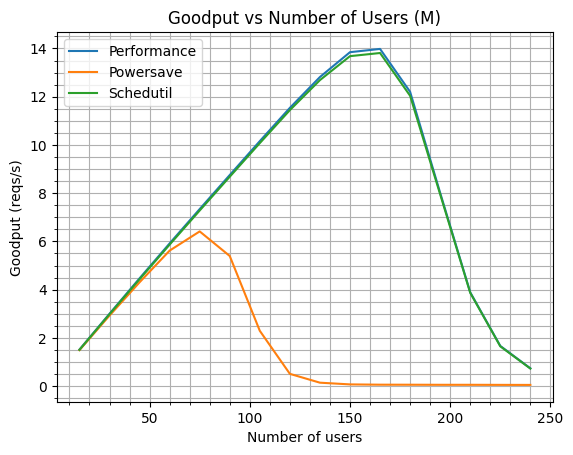

In [12]:
plt.plot(num_users_PERF, list(map(avg, good_puts_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, good_puts_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, good_puts_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Goodput (reqs/s)')
plt.title('Goodput vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/goodput.png')
plt.show()

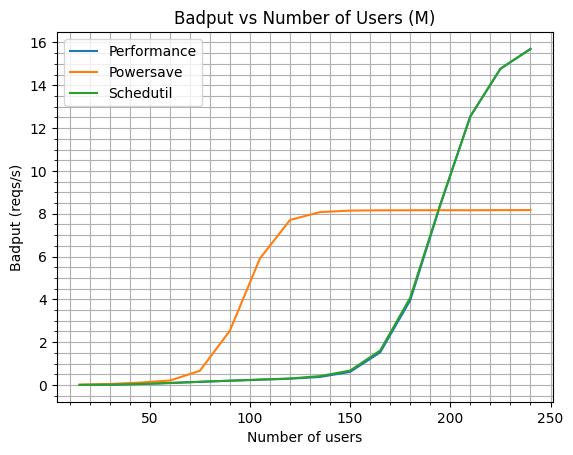

In [13]:
plt.plot(num_users_PERF, list(map(avg, bad_puts_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, bad_puts_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, bad_puts_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Badput (reqs/s)')
plt.title('Badput vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/badput.png')
plt.show()

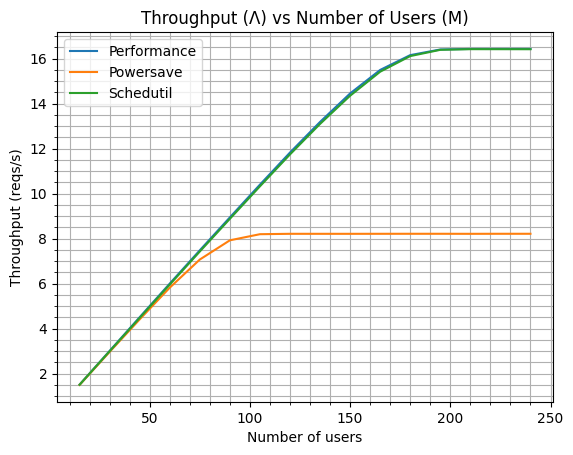

In [14]:
plt.plot(num_users_PERF, [ sum(x)  for x in zip( map(avg, good_puts_PERF) , map(avg, bad_puts_PERF)) ], label='Performance')
plt.plot(num_users_POWER, [ sum(x)  for x in zip( map(avg, good_puts_POWER) , map(avg, bad_puts_POWER)) ], label='Powersave')
plt.plot(num_users_SCHED, [ sum(x)  for x in zip( map(avg, good_puts_SCHED) , map(avg, bad_puts_SCHED)) ], label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Throughput (reqs/s)')
plt.title('Throughput (Λ) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/throughput.png')
plt.show()

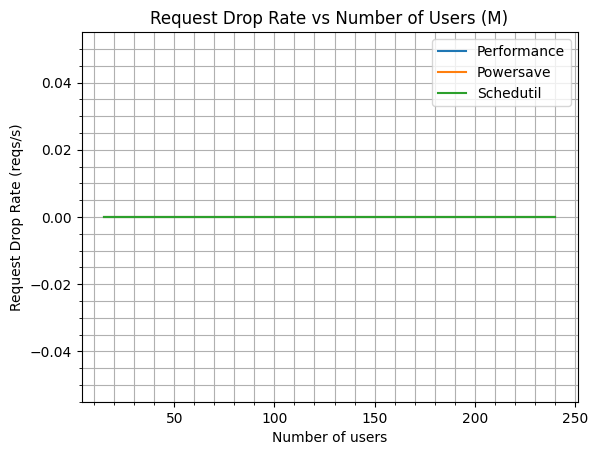

In [16]:
plt.plot(num_users_PERF, list(map(avg, request_drop_rates_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, request_drop_rates_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, request_drop_rates_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Request Drop Rate (reqs/s)')
plt.title('Request Drop Rate vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/req_drop_rate.png')
plt.show()

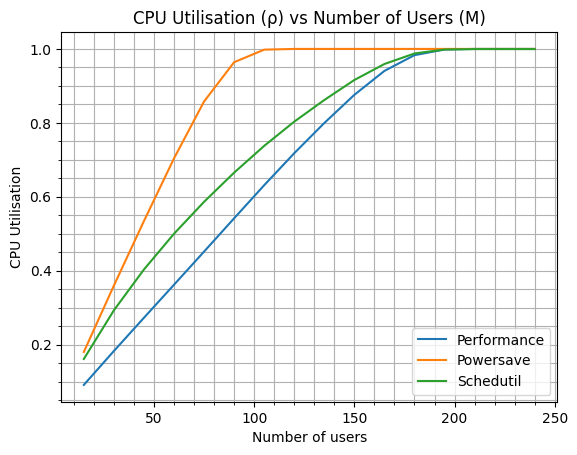

In [17]:
plt.plot(num_users_PERF, list(map(avg, core_utilisations_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, core_utilisations_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, core_utilisations_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('CPU Utilisation')
plt.title('CPU Utilisation (ρ) vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/utilisation.png')
plt.show()

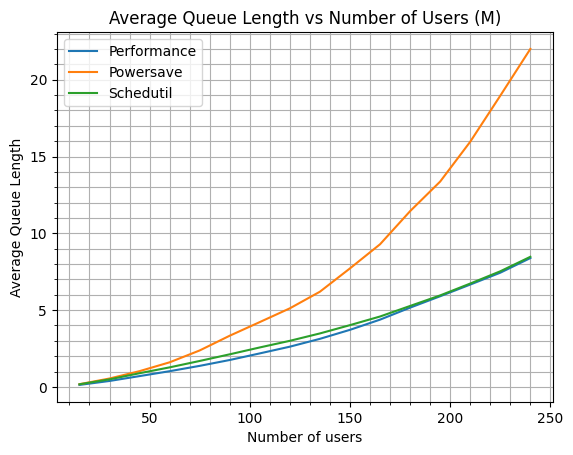

In [18]:
plt.plot(num_users_PERF, list(map(avg, avg_queue_length_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, avg_queue_length_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, avg_queue_length_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Average Queue Length')
plt.title('Average Queue Length vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/avg_queue_len.png')
plt.show()

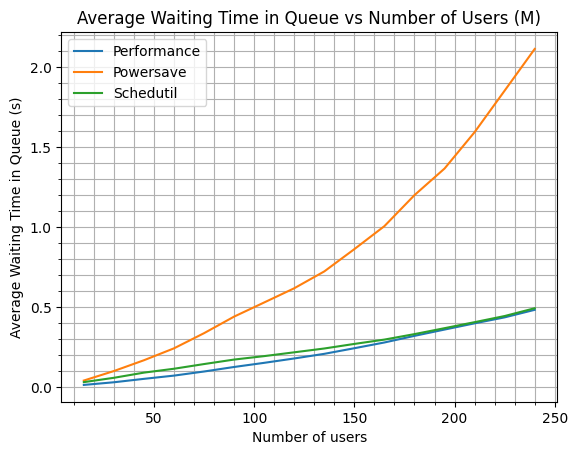

In [19]:
plt.plot(num_users_PERF, list(map(avg, avg_waiting_time_in_queue_PERF)), label='Performance')
plt.plot(num_users_POWER, list(map(avg, avg_waiting_time_in_queue_POWER)), label='Powersave')
plt.plot(num_users_SCHED, list(map(avg, avg_waiting_time_in_queue_SCHED)), label='Schedutil')
plt.xlabel('Number of users')
plt.ylabel('Average Waiting Time in Queue (s)')
plt.title('Average Waiting Time in Queue vs Number of Users (M)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/avg_queue_wait_time.png')
plt.show()

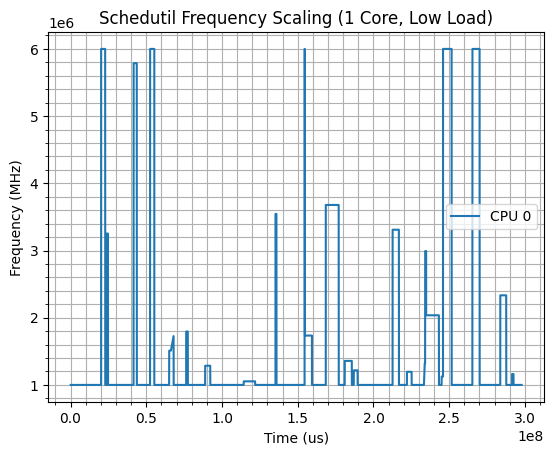

In [37]:
plt.plot(time_low_single, frequency_low_single, label='CPU 0')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (1 Core, Low Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_1core_low.png')
plt.show()

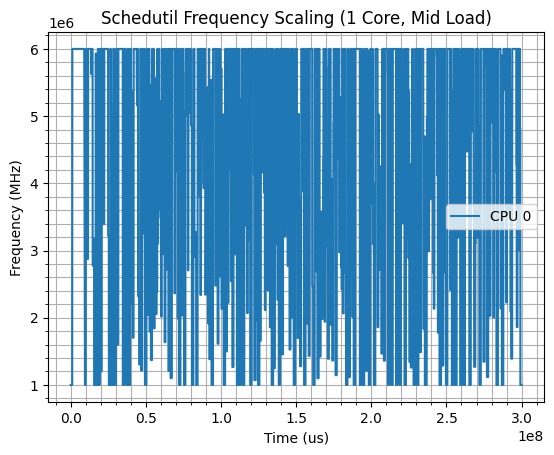

In [41]:
plt.plot(time_mid_single, frequency_mid_single, label='CPU 0')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (1 Core, Mid Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_1core_mid.png')
plt.show()

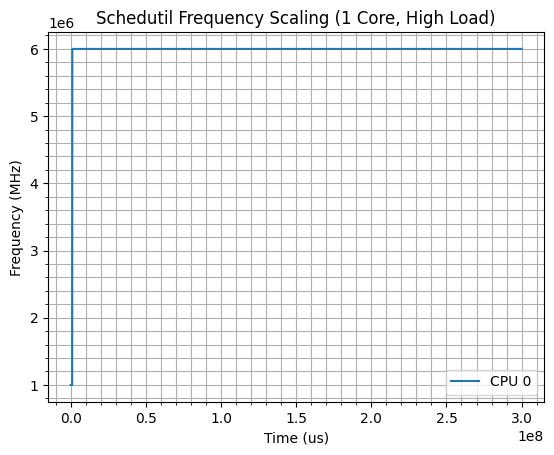

In [40]:
plt.plot(time_high_single, frequency_high_single, label='CPU 0')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (1 Core, High Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_1core_high.png')
plt.show()

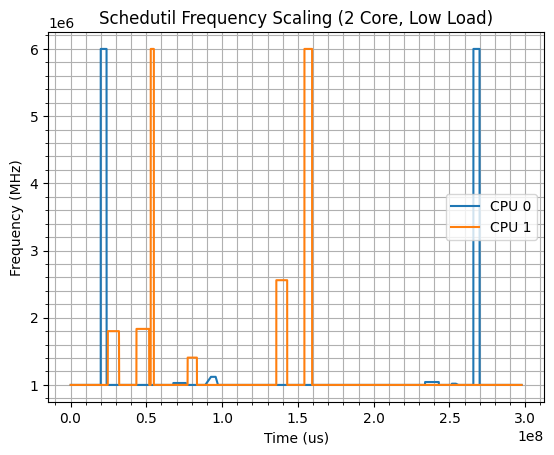

In [42]:
plt.plot(time_low_dual, frequency_low_one_dual, label='CPU 0')
plt.plot(time_low_dual, frequency_low_two_dual, label='CPU 1')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (2 Core, Low Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_2core_low.png')
plt.show()

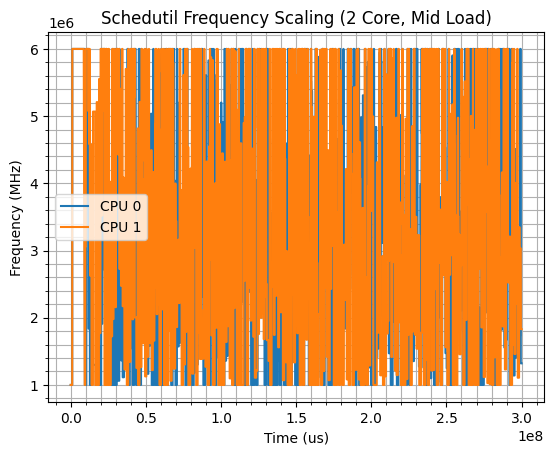

In [43]:
plt.plot(time_mid_dual, frequency_mid_one_dual, label='CPU 0')
plt.plot(time_mid_dual, frequency_mid_two_dual, label='CPU 1')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (2 Core, Mid Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_2core_mid.png')
plt.show()

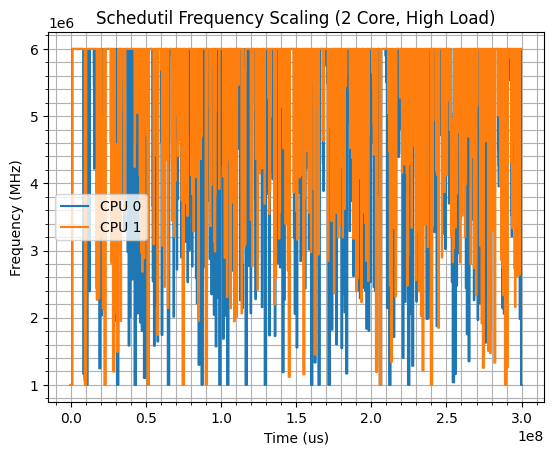

In [44]:
plt.plot(time_high_dual, frequency_high_one_dual, label='CPU 0')
plt.plot(time_high_dual, frequency_high_two_dual, label='CPU 1')
plt.xlabel('Time (us)')
plt.ylabel('Frequency (MHz)')
plt.title('Schedutil Frequency Scaling (2 Core, High Load)')
plt.minorticks_on()
plt.grid(True, 'both')
plt.legend()
plt.savefig('graphs/schedutil_2core_high.png')
plt.show()